In [1]:
# -----------------------------
# SVM Regression 
# -----------------------------

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

# Import datasets and tools from scikit-learn
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, SVC
from sklearn.metrics import (
    mean_squared_error, r2_score,
    confusion_matrix, classification_report, accuracy_score
)

In [37]:
# Loading the Financial Dataset
fin_data = pd.read_csv("compustat_2000_clean.csv", na_values = ["NA", "na", "?"], low_memory = False)

In [39]:
fin_data = fin_data.dropna(axis=1)
fin_data = fin_data.iloc[:5000]
fin_data.shape

(5000, 301)

In [41]:
# Define the selected 10 variables
selected_columns = ["at", "ni", "revt", "ceq", "epspx", "capx", "oibdp", "wcap", "dltt", "xsga"]

# Slice the DataFrame to include only these columns
fin_data_selected = fin_data[selected_columns]

# Display the first few rows
print(fin_data_selected.head())

        at      ni     revt      ceq  epspx    capx   oibdp     wcap     dltt  \
0  701.854  18.531  874.255  340.212   0.69  13.134  64.367  360.464  179.987   
1  710.199 -58.939  638.721  310.235  -2.08  12.112  27.207  286.192  217.699   
2  686.621 -12.410  606.337  294.988  -0.39   9.930  30.745  192.837  164.658   
3  709.292   3.504  651.958  301.684   0.11  10.286  47.491  300.943  248.666   
4  732.230  15.453  747.848  314.744   0.58  13.033  61.774  314.517  227.159   

     xsga  
0  96.077  
1  85.037  
2  78.845  
3  81.165  
4  87.902  


In [43]:
X = fin_data_selected  # Feature matrix
y = fin_data["ggroup"]  # Target vector
feature_names = fin_data_selected.columns
gics_mapping = {
    2010.0: "Capital Goods",
    2030.0: "Transportation",
    4520.0: "Technology Hardware & Equipment",
    2020.0: "Commercial & Professional Services",
    3510.0: "Health Care Equipment & Services",
    3520.0: "Pharmaceuticals, Biotechnology & Life Sciences",
    2540.0: "Media & Entertainment",
    1010.0: "Energy",
    4020.0: "Diversified Financials",
    5510.0: "Utilities",
    5020.0: "Media",
    4030.0: "Insurance",
    2550.0: "Retailing",
    2520.0: "Consumer Durables & Apparel",
    4510.0: "Software & Services",
    4530.0: "Semiconductors & Semiconductor Equipment",
    5010.0: "Telecommunication Services",
    1510.0: "Materials",
    3030.0: "Household & Personal Products",
    3010.0: "Food & Staples Retailing",
    6010.0: "Equity Real Estate Investment Trusts (REITs)",
    3020.0: "Food, Beverage & Tobacco",
    2510.0: "Automobiles & Components",
    2530.0: "Consumer Services",
    6020.0: "Real Estate Management & Development",
    4010.0: "Banks",
    4040.0: "Real Estate"
}

In [45]:
# Convert to a pandas DataFrame for easier handling
X_reg = pd.DataFrame(X, columns=["at", "ni", "revt", "ceq", "epspx", "capx", "oibdp", "wcap", "dltt", "xsga"])
y_reg = pd.DataFrame()  
y_reg['Industry'] = y  
y_reg['Industry'] = y_reg['Industry'].map(gics_mapping)

target_names = y_reg['Industry'].unique()

y_reg = y

# Convert y from a DataFrame to a NumPy array and flatten it
y_reg = y_reg.values.ravel() 

In [47]:
# Split the data into training and testing sets
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

In [49]:
# Standardize features for better performance
scaler_reg = StandardScaler()
X_reg_train = scaler_reg.fit_transform(X_reg_train)
X_reg_test = scaler_reg.transform(X_reg_test)

In [51]:
# Set up the SVR model with hyperparameter tuning using GridSearchCV
svr = SVR()
param_grid_reg = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}
grid_search_reg = GridSearchCV(
    svr, param_grid_reg, cv=5, scoring='neg_mean_squared_error'
)
grid_search_reg.fit(X_reg_train, y_reg_train)

# Retrieve the best estimator and print best parameters
best_svr = grid_search_reg.best_estimator_
print("Best SVR parameters:", grid_search_reg.best_params_)

Best SVR parameters: {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}


In [53]:
# If the chosen kernel is linear, attempt to print coefficients if available
if hasattr(best_svr, 'coef_'):
    print("SVR Coefficients:", best_svr.coef_)
else:
    print("SVR model does not provide coefficients (likely due to the kernel type).")

SVR Coefficients: [[40.22682603 17.06166647 -4.3549875  19.5383678  14.43824906  5.22746376
  22.80066169  7.65827179 33.35635282 26.46385737]]


In [55]:
# Diagnose and evaluate the SVR model
y_reg_pred = best_svr.predict(X_reg_test)
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)
print("SVR Regression Mean Squared Error:", mse)
print("SVR Regression R2 Score:", r2)

SVR Regression Mean Squared Error: 1933950.192127329
SVR Regression R2 Score: -0.003445385270258061


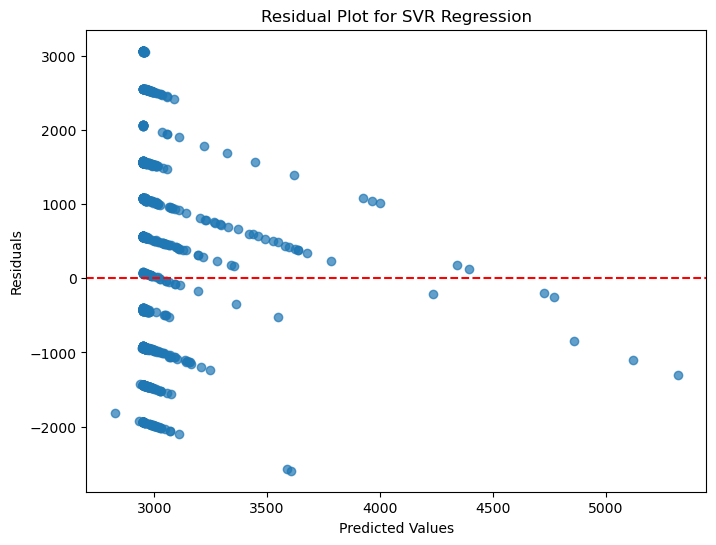

In [57]:
# Plot residuals to diagnose errors
plt.figure(figsize=(8, 6))
plt.scatter(y_reg_pred, y_reg_test - y_reg_pred, alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for SVR Regression')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [1]:
# -----------------------------
# SVM Classification 
# -----------------------------

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

# Import datasets and tools from scikit-learn
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, SVC
from sklearn.metrics import (
    mean_squared_error, r2_score,
    confusion_matrix, classification_report, accuracy_score
)

In [3]:
# Loading the Financial Dataset
fin_data = pd.read_csv("compustat_2000_clean.csv", na_values = ["NA", "na", "?"], low_memory = False)

In [5]:
fin_data = fin_data.dropna(axis=1)
fin_data = fin_data.iloc[:5000]
fin_data.shape

(5000, 301)

In [7]:
# Define the selected 10 variables
selected_columns = ["at", "ni", "revt", "ceq", "epspx", "capx", "oibdp", "wcap", "dltt", "xsga"]

# Slice the DataFrame to include only these columns
fin_data_selected = fin_data[selected_columns]

# Display the first few rows
print(fin_data_selected.head())

        at      ni     revt      ceq  epspx    capx   oibdp     wcap     dltt  \
0  701.854  18.531  874.255  340.212   0.69  13.134  64.367  360.464  179.987   
1  710.199 -58.939  638.721  310.235  -2.08  12.112  27.207  286.192  217.699   
2  686.621 -12.410  606.337  294.988  -0.39   9.930  30.745  192.837  164.658   
3  709.292   3.504  651.958  301.684   0.11  10.286  47.491  300.943  248.666   
4  732.230  15.453  747.848  314.744   0.58  13.033  61.774  314.517  227.159   

     xsga  
0  96.077  
1  85.037  
2  78.845  
3  81.165  
4  87.902  


In [9]:
X = fin_data_selected  # Feature matrix
y = fin_data["ggroup"]  # Target vector
feature_names = fin_data_selected.columns
gics_mapping = {
    2010.0: "Capital Goods",
    2030.0: "Transportation",
    4520.0: "Technology Hardware & Equipment",
    2020.0: "Commercial & Professional Services",
    3510.0: "Health Care Equipment & Services",
    3520.0: "Pharmaceuticals, Biotechnology & Life Sciences",
    2540.0: "Media & Entertainment",
    1010.0: "Energy",
    4020.0: "Diversified Financials",
    5510.0: "Utilities",
    5020.0: "Media",
    4030.0: "Insurance",
    2550.0: "Retailing",
    2520.0: "Consumer Durables & Apparel",
    4510.0: "Software & Services",
    4530.0: "Semiconductors & Semiconductor Equipment",
    5010.0: "Telecommunication Services",
    1510.0: "Materials",
    3030.0: "Household & Personal Products",
    3010.0: "Food & Staples Retailing",
    6010.0: "Equity Real Estate Investment Trusts (REITs)",
    3020.0: "Food, Beverage & Tobacco",
    2510.0: "Automobiles & Components",
    2530.0: "Consumer Services",
    6020.0: "Real Estate Management & Development",
    4010.0: "Banks",
    4040.0: "Real Estate"
}

In [11]:
# Convert to a pandas DataFrame for easier handling
X_clf = pd.DataFrame(X, columns=["at", "ni", "revt", "ceq", "epspx", "capx", "oibdp", "wcap", "dltt", "xsga"])
y_clf = pd.DataFrame()  
y_clf['Industry'] = y  
y_clf['Industry'] = y_clf['Industry'].map(gics_mapping)

target_names = y_clf['Industry'].unique()

y_clf = y

# Convert y from a DataFrame to a NumPy array and flatten it
y_clf = y_clf.values.ravel() 

In [13]:
# Create a DataFrame to show descriptive statistics
df_clf = X_clf
df_clf['target'] = y
print("Classification Task Descriptive Statistics:")
print("Independent Variables (features):", selected_columns)
print("Dependent Variable (target) mapped to classes:", target_names)
print(df_clf.describe())
print("\n" + "="*60 + "\n")

Classification Task Descriptive Statistics:
Independent Variables (features): ['at', 'ni', 'revt', 'ceq', 'epspx', 'capx', 'oibdp', 'wcap', 'dltt', 'xsga']
Dependent Variable (target) mapped to classes: ['Capital Goods' 'Transportation' 'Technology Hardware & Equipment'
 'Commercial & Professional Services' 'Health Care Equipment & Services'
 'Pharmaceuticals, Biotechnology & Life Sciences' 'Media & Entertainment'
 'Energy' 'Diversified Financials' 'Utilities' 'Media' 'Insurance'
 'Retailing' 'Consumer Durables & Apparel' 'Software & Services'
 'Semiconductors & Semiconductor Equipment' 'Telecommunication Services'
 'Materials' 'Household & Personal Products' 'Food & Staples Retailing'
 'Equity Real Estate Investment Trusts (REITs)' 'Food, Beverage & Tobacco'
 'Automobiles & Components' 'Consumer Services'
 'Real Estate Management & Development' 'Banks' 'Real Estate']
                 at            ni           revt            ceq        epspx  \
count  5.000000e+03   5000.000000    50

In [15]:
# Split the data into training and testing sets
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

In [17]:
# Standardize features for classification
scaler_clf = StandardScaler()
X_clf_train = scaler_clf.fit_transform(X_clf_train)
X_clf_test = scaler_clf.transform(X_clf_test)

In [19]:
# Set up the SVC model with hyperparameter tuning using GridSearchCV
svc = SVC(probability=True)
param_grid_clf = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
grid_search_clf = GridSearchCV(
    svc, param_grid_clf, cv=5, scoring='accuracy'
)
grid_search_clf.fit(X_clf_train, y_clf_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [21]:
# Retrieve the best classifier and print best parameters
best_svc = grid_search_clf.best_estimator_
print("Best SVC parameters:", grid_search_clf.best_params_)

# If the chosen kernel is linear, attempt to print coefficients if available
if hasattr(best_svc, 'coef_'):
    print("SVC Coefficients:", best_svc.coef_)
else:
    print("SVC model does not provide coefficients (likely due to the kernel type).")

Best SVC parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
SVC Coefficients: [[-1.19088893e-03 -3.77269287e-04  3.62223989e-04 ...  3.76645877e-04
  -3.81059928e-04 -5.55492644e+00]
 [-1.13592626e-03 -5.33507406e-04  2.22071078e-04 ...  1.09812880e-03
  -1.38629820e-03 -2.77737879e+00]
 [-4.33237301e-04  2.18884000e-04  9.98816809e-04 ...  2.09061968e-03
  -4.39294982e-04 -2.75035702e+00]
 ...
 [-1.18380765e-02 -1.26413596e-02  3.40030516e-02 ... -1.71934415e-02
  -2.34285493e-02 -5.55262401e+00]
 [ 1.29490543e-02 -5.77377638e-03  2.51573749e-02 ... -9.81939009e-03
  -7.77101963e-03 -5.44562309e+00]
 [ 1.10724261e+00  7.53756244e-01  7.06066636e-02 ...  6.53696110e+00
   4.10463340e-01 -2.66462479e+00]]


In [23]:
# Diagnose and evaluate the SVC model
y_clf_pred = best_svc.predict(X_clf_test)
accuracy = accuracy_score(y_clf_test, y_clf_pred)
print("SVC Classification Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_clf_test, y_clf_pred))

SVC Classification Accuracy: 0.762
Classification Report:
               precision    recall  f1-score   support

      1010.0       1.00      1.00      1.00        62
      1510.0       1.00      1.00      1.00        97
      2010.0       0.59      1.00      0.74        91
      2020.0       1.00      0.24      0.38        55
      2030.0       1.00      0.66      0.80        62
      2510.0       0.00      0.00      0.00         7
      2520.0       0.53      0.96      0.68        45
      2530.0       0.88      0.29      0.44        24
      2540.0       1.00      0.17      0.29         6
      2550.0       0.92      0.57      0.71        21
      3010.0       0.00      0.00      0.00         3
      3020.0       0.74      1.00      0.85        29
      3030.0       1.00      0.36      0.53        11
      3510.0       0.72      1.00      0.84        81
      3520.0       1.00      0.14      0.24        37
      4010.0       0.80      0.36      0.50        11
      4020.0       0.9

C:\Users\andy_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andy_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andy_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


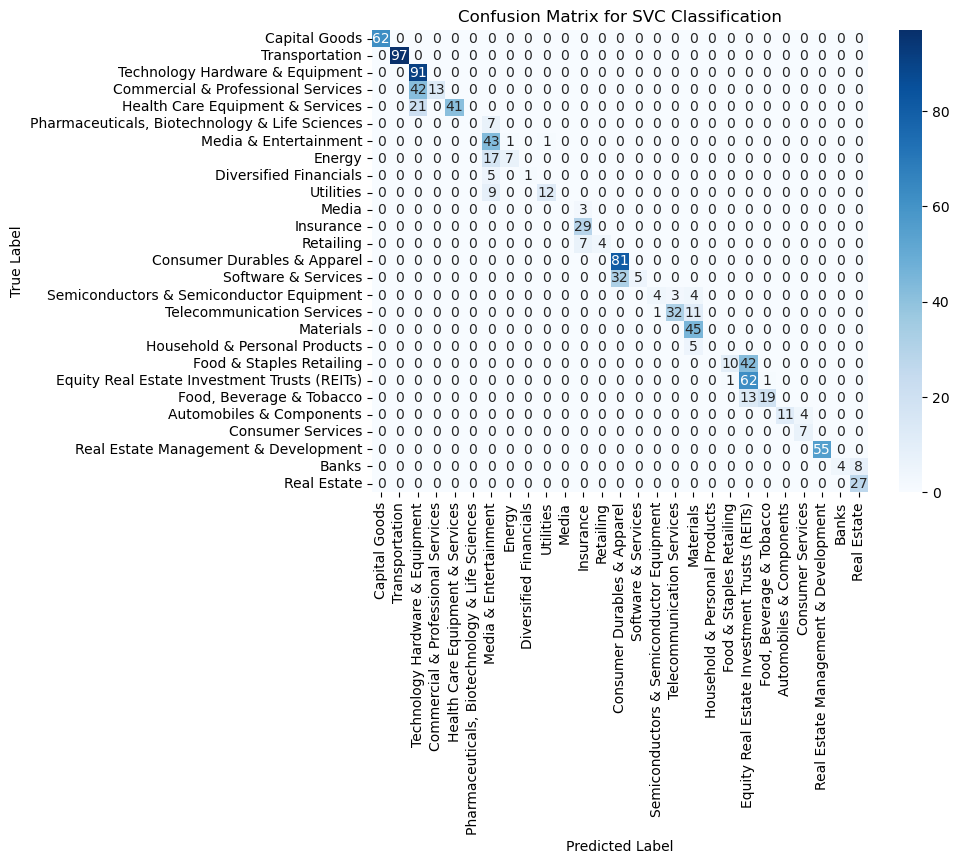

In [25]:
# Plot the confusion matrix
cm = confusion_matrix(y_clf_test, y_clf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVC Classification')
plt.show()